# Notebook for any required pre-processing tasks prior to WML segmentation

## Visualize and save Model paths

In [1]:
import os
def get_subfolders(root_dir, dir_list=None):
    if dir_list is None:
        dir_list = []

    subfolders = [f for f in os.listdir(os.path.join(root_dir, *dir_list)) 
                   if f.lower() != 'readme.txt' and f != '.DS_Store']
    return subfolders

In [2]:
root_dir = '/Users/karissachan/Library/CloudStorage/GoogleDrive-karissa.chan@torontomu.ca/Shared drives/_Models/Neuro/WML/RA Models'
dest_dir = '/Users/karissachan/Library/CloudStorage/GoogleDrive-karissa.chan@torontomu.ca/Shared drives/Karissa Chan/NeuroAI Pipeline/wml_segmentation_testing/final_models'

folders = get_subfolders(root_dir)


for folder in folders:
    print(folder)
    subfolders1 = get_subfolders(root_dir,[folder])
    print(subfolders1)
    for subfolder in subfolders1:
        subfolders2 = get_subfolders(root_dir, [folder, subfolder])
        print(subfolders2)



WML_Vascular_Lesion_Training
['SC-UNET']
['cf1', 'cf0', 'all_data', 'cf2', 'cf3', 'cf4']
WML_Stroke_Multi-Class_Training
['SC-UNET False Positive Multi Class']
['models', 'test_files.txt', 'logs', 'figures', 'params', 'history']
WML_Multi-View_Training
['U-Net']
['Sagittal Model', 'Axial Model', 'Coronal Model', 'MICCAI Axial']
WML_GS_SS_Training
['SC-UNET']
['pre_train_on_CAIN-SS_30EP', 'fine_tune_on_MICCAI-GS_75EP', 'individual_datasets_GS_75EP', 'pre_train_on_CAIN-SS_75EP', 'fine_tune_on_MICCAI-GS_30EP']
WML_False_Positive_Training
['SC-UNET']
['fp-cf', 'weights', 'nfp-cf']


In [3]:
import json

json_model_dict = [
    {
    'name': root_dir + '/WML_False_Positive_Training',
    'model_paths': [
        'SC-UNET/fp-cf/sc-fp_cf5/models/model_scunet_GDL.hdf5',
        'SC-UNET/nfp-cf/sc-nfp_cf5/models/model_scunet_GDL.hdf5'
    ]
},

    {
    'name': root_dir + '/WML_GS_SS_Training',
    'model_paths': [
        'SC-UNET/pre_train_on_CAIN-SS_30EP/fold_1/models/model_scunet_GDL.hdf5',
        'SC-UNET/pre_train_on_CAIN-SS_75EP/fold_1/models/model_scunet_GDL.hdf5',
        'SC-UNET/fine_tune_on_MICCAI-GS_30EP/fold_1/models/model_scunet_GDL.hdf5',
        'SC-UNET/fine_tune_on_MICCAI-GS_75EP/fold_1/models/model_scunet_GDL.hdf5',
        'SC-UNET/individual_datasets_GS_75EP/ADNI/models/model_scunet_GDL.hdf5',
        'SC-UNET/individual_datasets_GS_75EP/CAIN/models/model_scunet_GDL.hdf5',
        'SC-UNET/individual_datasets_GS_75EP/CCNA/models/model_scunet_GDL.hdf5'
    ]
},

{
    'name': root_dir + '/WML_Multi-View_Training',
    'model_paths': [
        'U-Net/Axial Model/model_files/models/model_unet_GDL.hdf5'
    ]
},

{
    'name': root_dir + '/WML_Stroke_Multi-Class_Training',
    'model_paths': [
        'SC-UNET False Positive Multi Class/models/model_scunetmulticlass_GDL.hdf5'
    ]
},

{
    'name': root_dir + '/WML_Vascular_Lesion_Training',
    'model_paths': [
        'SC-UNET/all_data/models/model_scunet_GDL.hdf5'
    ]
}
]

In [4]:
def create_model_directory_from_json(json_model_dict, output_file):
    """
    Create a model directory mapping from JSON structure and save to text file.
    
    Args:
        json_model_dict (list): List of dictionaries containing model information
        output_file (str): Path to save the output text file
    """
    try:
        model_paths = {}
        
        # Iterate through each entry in the JSON structure
        for entry in json_model_dict:
            base_path = entry['name']
            base_path = base_path.split('/')[-1]
            
            # Process each model path
            for model_path in entry['model_paths']:
                # Get the model name from the path
                model_parts = model_path.split('/')
                model_name = base_path + '_' + '_'.join(model_parts[:-2])  # Join all parts except the last file name
                
                # Create full path
                full_path = os.path.join(base_path, model_path)
                model_paths[model_name] = full_path
        
        # Save to text file
        with open(output_file, 'w') as f:
            f.write("Model Directory Mapping\n")
            f.write("=" * 80 + "\n\n")
            
            # Write each model and its path
            for model_name, path in sorted(model_paths.items()):
                f.write(f"Model: {model_name}\n")
                f.write(f"Path: {path}\n")
                f.write("-" * 80 + "\n\n")
                
        print(f"Model directory saved to: {output_file}")
    
        
    except Exception as e:
        print(f"Error creating model directory: {str(e)}")
    
    return model_paths

# Example usage:
output_file = "model_paths.txt"
model_paths = create_model_directory_from_json(json_model_dict, output_file)

for i, (name, path) in enumerate(list(model_paths.items())):
    print(f"\nModel {i+1}:")
    print(f"Name: {name}")
    print(f"Path: {path}")

Model directory saved to: model_paths.txt

Model 1:
Name: WML_False_Positive_Training_SC-UNET_fp-cf_sc-fp_cf5
Path: WML_False_Positive_Training/SC-UNET/fp-cf/sc-fp_cf5/models/model_scunet_GDL.hdf5

Model 2:
Name: WML_False_Positive_Training_SC-UNET_nfp-cf_sc-nfp_cf5
Path: WML_False_Positive_Training/SC-UNET/nfp-cf/sc-nfp_cf5/models/model_scunet_GDL.hdf5

Model 3:
Name: WML_GS_SS_Training_SC-UNET_pre_train_on_CAIN-SS_30EP_fold_1
Path: WML_GS_SS_Training/SC-UNET/pre_train_on_CAIN-SS_30EP/fold_1/models/model_scunet_GDL.hdf5

Model 4:
Name: WML_GS_SS_Training_SC-UNET_pre_train_on_CAIN-SS_75EP_fold_1
Path: WML_GS_SS_Training/SC-UNET/pre_train_on_CAIN-SS_75EP/fold_1/models/model_scunet_GDL.hdf5

Model 5:
Name: WML_GS_SS_Training_SC-UNET_fine_tune_on_MICCAI-GS_30EP_fold_1
Path: WML_GS_SS_Training/SC-UNET/fine_tune_on_MICCAI-GS_30EP/fold_1/models/model_scunet_GDL.hdf5

Model 6:
Name: WML_GS_SS_Training_SC-UNET_fine_tune_on_MICCAI-GS_75EP_fold_1
Path: WML_GS_SS_Training/SC-UNET/fine_tune_on_MIC

## Brain extract 

In [1]:
import nibabel as nib
import os

In [6]:
data_path = "/Users/karissachan/Library/CloudStorage/GoogleDrive-karissa.chan@torontomu.ca/Shared drives/Karissa Chan/NeuroAI Pipeline/wml_segmentation_testing/test_inference_data/Standardized_For_WML"
out_path = "/Users/karissachan/Library/CloudStorage/GoogleDrive-karissa.chan@torontomu.ca/Shared drives/Karissa Chan/NeuroAI Pipeline/wml_segmentation_testing/test_inference_data/Standardized_and_Brain_Extracted_For_WML/"
brain_folder = os.path.join(data_path, "brain_mask")

volumes = os.listdir(brain_folder)
for folder in os.listdir(data_path):
    if folder.startswith(".DS_Store") or folder == "brain_mask":
            continue
    new_folder = os.path.join(out_path, folder)
    os.makedirs(new_folder, exist_ok=True)
    for volume in volumes:

        if volume.startswith(".DS_Store"):
            continue
        brain_mask = nib.load(os.path.join(brain_folder, volume)).get_fdata()
        orig = nib.load(os.path.join(data_path, folder, volume))
        header = orig.header
        affine = orig.affine
        vol = orig.get_fdata()

        vol = vol * brain_mask
        new_vol = nib.Nifti1Image(vol, affine, header)
        nib.save(new_vol, os.path.join(new_folder, volume))


In [8]:
# spot check save worked
vol = nib.load(os.path.join(new_folder, volume))
print(vol.shape)
print(vol.affine)
print(vol.header)
print(vol.get_fdata().shape)
print(vol.get_fdata().min())
print(vol.get_fdata().max())

vol = nib.load(os.path.join(data_path, folder, volume))
print(vol.shape)
print(vol.affine)
print(vol.header)
print(vol.get_fdata().shape)
print(vol.get_fdata().min())
print(vol.get_fdata().max())

(256, 256, 48)
[[-9.36815977e-01 -3.21625248e-02 -5.03593460e-02  1.28095444e+02]
 [-3.09648849e-02  9.34605718e-01 -2.13693738e-01 -8.00334625e+01]
 [-1.79797560e-02  6.62110150e-02  2.99194503e+00 -7.66196136e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : np.bytes_(b'')
db_name         : np.bytes_(b'')
extents         : 0
session_error   : 0
regular         : np.bytes_(b'r')
dim_info        : 0
dim             : [  3 256 256  48   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [-1.      0.9375  0.9375  3.      9.      0.      0.      0.    ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_du

## Check sampled patches by FP/Positive/Negative class

In [27]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import random

In [28]:
sampled_xls_path = "/Users/karissachan/Documents/GitHub/karissachan/wml-seg-data-sampling/tests/data/sample_patches/sampled_data_info.csv"
sampled_xls = pd.read_csv(sampled_xls_path)
display(sampled_xls.head())

patch_dir = '/Users/karissachan/Documents/GitHub/karissachan/wml-seg-data-sampling/tests/data/sample_patches/'

,File,Vol File,Dataset,Image Size,Class,Num FP,Num WML,Num Pixels
0,002-S-5230-v1_CU_slice_50_patch_1,002-S-5230-v1_CU.nii.gz,ADNI,"(64, 64)",negative,0,0,4096
1,002-S-5230-v1_CU_slice_50_patch_2,002-S-5230-v1_CU.nii.gz,ADNI,"(64, 64)",negative,0,0,4096
2,002-S-5230-v1_CU_slice_50_patch_3,002-S-5230-v1_CU.nii.gz,ADNI,"(64, 64)",negative,0,0,4096
3,002-S-5230-v1_CU_slice_50_patch_4,002-S-5230-v1_CU.nii.gz,ADNI,"(64, 64)",negative,0,0,4096
4,002-S-5230-v1_CU_slice_51_patch_1,002-S-5230-v1_CU.nii.gz,ADNI,"(64, 64)",negative,0,0,4096


In [45]:
negative_sample = sampled_xls[sampled_xls['Class'] == 'negative'].sample(n=1)['File'].iloc[0]
fp_sample = sampled_xls[sampled_xls['Class'] == 'fp'].sample(n=1)['File'].iloc[0]
positive_sample = sampled_xls[sampled_xls['Class'] == 'positive'].sample(n=1)['File'].iloc[0]

print(negative_sample)


002-S-5230-v1_CU_slice_153_patch_22


(64, 64)
(64, 64)


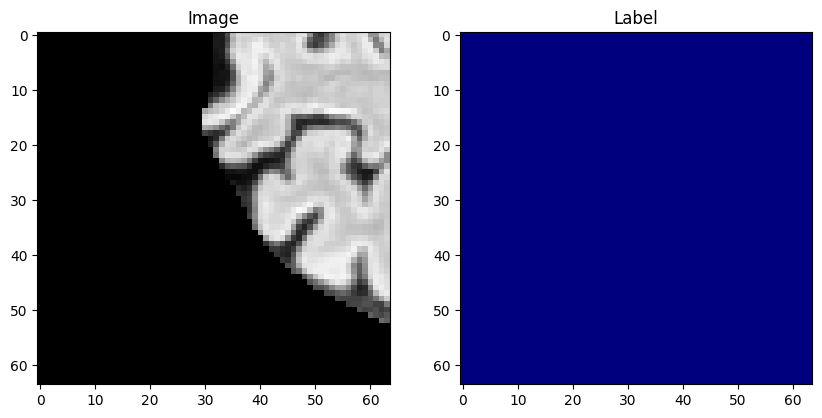

In [46]:
img = np.load(os.path.join(patch_dir, 'images', negative_sample+'.npy'))
label = np.load(os.path.join(patch_dir, 'labels', negative_sample+'.npy'))

print(img.shape)
print(label.shape)


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Image')
plt.subplot(1, 2, 2)
plt.imshow(label, cmap='jet')
plt.title('Label')
plt.show()

(64, 64)
(64, 64)


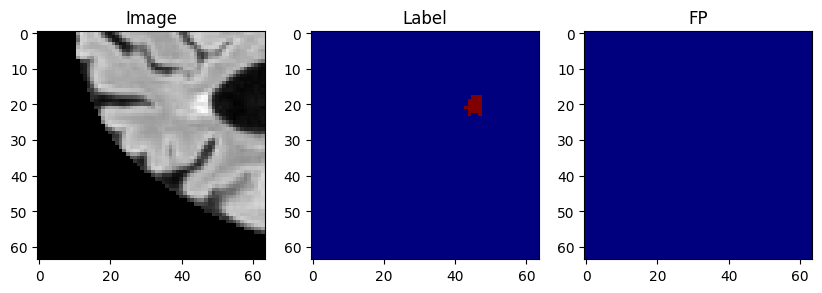

In [47]:
img = np.load(os.path.join(patch_dir, 'images', positive_sample+'.npy'))
label = np.load(os.path.join(patch_dir, 'labels', positive_sample+'.npy'))
fp = np.load(os.path.join(patch_dir, 'fps', positive_sample+'.npy'))

print(img.shape)
print(label.shape)


plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Image')
plt.subplot(1, 3, 2)
plt.imshow(label, cmap='jet')
plt.title('Label')
plt.subplot(1, 3, 3)
plt.imshow(fp, cmap='jet')
plt.title('FP')
plt.show()

(64, 64)
(64, 64)


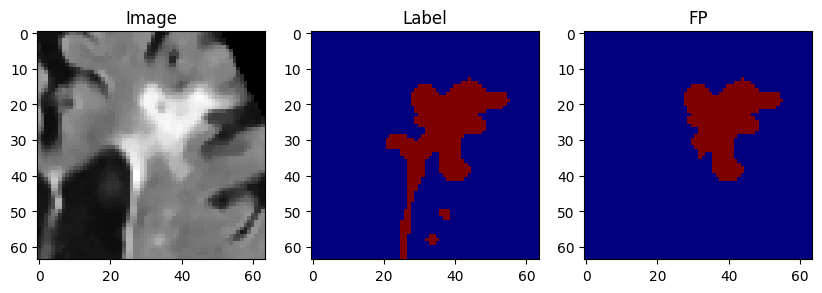

In [48]:
img = np.load(os.path.join(patch_dir, 'images', fp_sample+'.npy'))
label = np.load(os.path.join(patch_dir, 'labels', fp_sample+'.npy'))
fp = np.load(os.path.join(patch_dir, 'fps', fp_sample+'.npy'))

print(img.shape)
print(label.shape)


plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Image')
plt.subplot(1, 3, 2)
plt.imshow(label, cmap='jet')
plt.title('Label')
plt.subplot(1, 3, 3)
plt.imshow(fp, cmap='jet')
plt.title('FP')
plt.show()